# Part 1: Digit recognition using CNNs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize input data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape to add channel dimension
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Create a "super AlexNet" inspired CNN
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),

    layers.Conv2D(96, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(96, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1)),

    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 96)     │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 256)    │       221,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 7, 7, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,735,658 (239.32 MB)

 Trainable params: 62,734,250 (239.31 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [3]:
# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_cat,
                    epochs=5,
                    batch_size=128,
                     validation_split=0.1)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 59ms/step - accuracy: 0.6009 - loss: 1.5981 - val_accuracy: 0.9485 - val_loss: 0.2294
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9707 - loss: 0.1109 - val_accuracy: 0.9813 - val_loss: 0.0733
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9797 - loss: 0.0845 - val_accuracy: 0.9825 - val_loss: 0.0635
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9828 - loss: 0.0692 - val_accuracy: 0.9857 - val_loss: 0.0525
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9840 - loss: 0.0679 - val_accuracy: 0.9835 - val_loss: 0.0629


Test accuracy: 0.9860


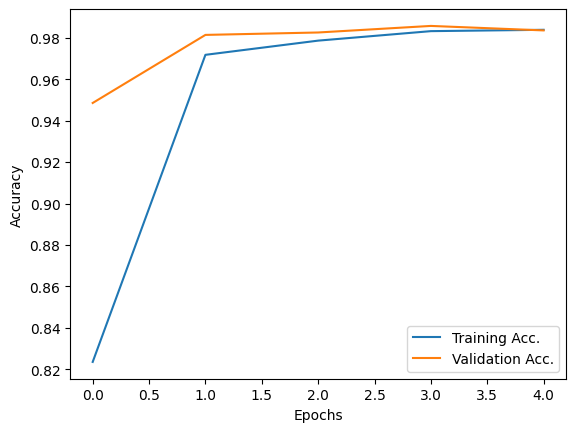

In [4]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Training Acc.')
plt.plot(history.history['val_accuracy'], label='Validation Acc.')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [5]:
model.save('mnist_cnn_model.keras')

 # Part 2: Input optimization for a CNN

In [6]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load model
model = load_model('mnist_cnn_model.keras')

In [7]:
def optimize_input_image(model, target_output, img, steps=300, lr=0.05, seed=None):
    optimized_img = tf.Variable(img, trainable=True)

    # Optimization parameters
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
    loss_history = []

    for i in range(steps):
        with tf.GradientTape() as tape:
            output = model(optimized_img)
            loss = tf.keras.losses.categorical_crossentropy(target_output, output)

            # Regularization: encourage smooth images and stay in [0, 1]
            reg_loss = tf.reduce_sum(tf.square(optimized_img))
            total_loss = loss + 1e-4 * reg_loss

        grads = tape.gradient(total_loss, optimized_img)
        optimizer.apply_gradients([(grads, optimized_img)])

        # Keep values in [0, 1]
        optimized_img.assign(tf.clip_by_value(optimized_img, 0.0, 1.0))

        loss_history.append(total_loss.numpy()[0])

        if i % 50 == 0:
            print(f"Iteration {i}, Loss: {total_loss.numpy()[0]}")

    return optimized_img.numpy().squeeze(), loss_history

Iteration 0, Loss: 2.2590925693511963
Iteration 50, Loss: 0.004785106051713228
Iteration 100, Loss: 0.00459204101935029
Iteration 150, Loss: 0.004386198706924915
Iteration 200, Loss: 0.004171775188297033
Iteration 250, Loss: 0.00395073089748621
Iteration 300, Loss: 0.0037266265135258436
Iteration 350, Loss: 0.0035026734694838524
Iteration 400, Loss: 0.0032813686411827803
Iteration 450, Loss: 0.003066056640818715


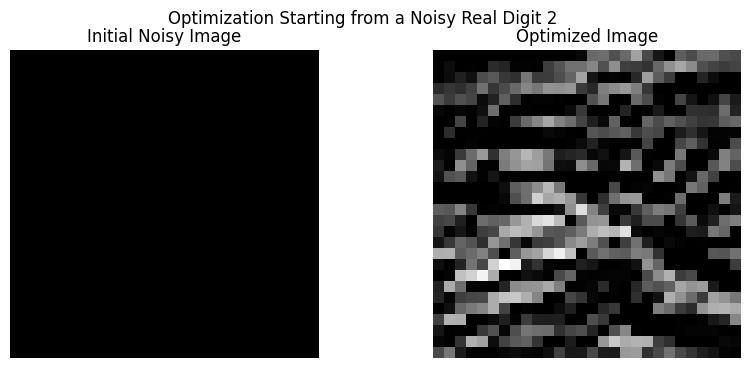

In [9]:
import numpy as np

add_noise = False

initial_img = tf.zeros((1, 28, 28, 1), dtype=tf.float32)

target_digit = 2
target_output = np.zeros((1, 10), dtype=np.float32)
target_output[0, target_digit] = 1.0

# Run optimization starting from noisy real image
optimized_img, loss_history = optimize_input_image(model, target_output, initial_img, steps=500)

# Plot results
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(initial_img.numpy().squeeze(), cmap='gray')
plt.title("Initial Noisy Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(optimized_img, cmap='gray')
plt.title("Optimized Image")
plt.axis('off')

plt.suptitle("Optimization Starting from a Noisy Real Digit 2")
plt.show()

Iteration 0, Loss: 0.08724828064441681
Iteration 50, Loss: 0.009465720504522324
Iteration 100, Loss: 0.005961489863693714
Iteration 150, Loss: 0.0038891721051186323
Iteration 200, Loss: 0.0026138348039239645
Iteration 250, Loss: 0.0018014402594417334


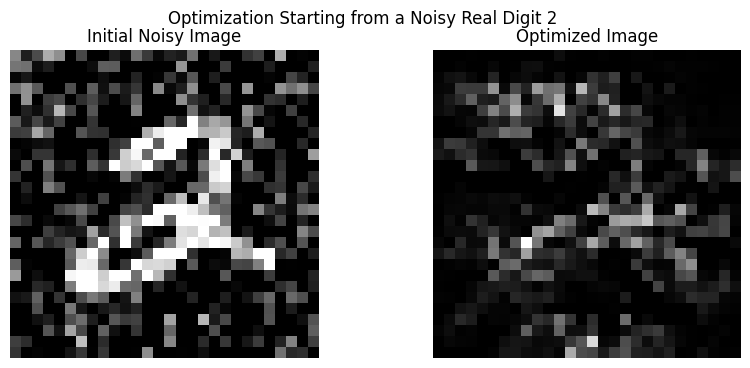

In [10]:
import numpy as np

add_noise = True

target_digit = 2
# Pick a real image of digit 2 from training set
digit_2_real = x_train[y_train == target_digit][0]  # Shape: (28, 28)
digit_2_real = digit_2_real.reshape(1, 28, 28, 1) # Model expects input in batch shape

target_output = np.zeros((1, 10), dtype=np.float32)
target_output[0, target_digit] = 1.0


if not add_noise:
    initial_img = digit_2_real
else:
    # Add Gaussian noise
    np.random.seed(0)
    noise = 0.3 * np.random.randn(28, 28, 1) # Scale the noise to be less intense
    initial_img = digit_2_real + noise
    # Ensure that pixel values stay in valid range [0,1][0,1]
    initial_img = np.clip(initial_img, 0, 1).astype(np.float32)

# Run optimization starting from noisy real image
optimized_img, loss_history = optimize_input_image(model, target_output, steps=300, img=initial_img.reshape(1, 28, 28, 1))

# Plot results
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(initial_img.squeeze(), cmap='gray')
plt.title("Initial Noisy Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(optimized_img, cmap='gray')
plt.title("Optimized Image")
plt.axis('off')

plt.suptitle("Optimization Starting from a Noisy Real Digit 2")
plt.show()

In [11]:
def create_input_img(x_train, y_train, base_digit,
                     start_from_real_image=True,
                     add_noise=True,
                     noise_scale=0.3,
                     seed=0):

    np.random.seed(seed)

    if start_from_real_image:
        real_image = x_train[y_train == base_digit][0].reshape(1, 28, 28, 1).astype(np.float32)
        initial_img = real_image
    else:
        initial_img = np.zeros((1, 28, 28, 1), dtype=np.float32)

    if add_noise:
        noise = noise_scale * np.random.randn(1, 28, 28, 1)
        initial_img += noise
        initial_img = np.clip(initial_img, 0.0, 1.0)

    return initial_img


def run_digit_optimization(model, x_train, y_train,
                                     target_vector=None,
                                     start_from_real_image=True,
                                     add_noise=True,
                                     noise_scale=0.3,
                                     steps=500,
                                     seed=0,
                                     show_plot=True):

    # Create target output
    if target_vector is not None:
        target_output = np.array(target_vector, dtype=np.float32).reshape(1, 10)
    else:
        target_output = np.zeros((1, 10), dtype=np.float32)
        target_output[0, target_digit] = 1.0

    # Set base digit (for real image or default selection)
    base_digit = target_digit if target_digit is not None else np.argmax(target_output)

    if start_from_real_image:
        # Start from a real image of the digit
        real_image = x_train[y_train == base_digit][0].reshape(1, 28, 28, 1)
        initial_img = real_image.astype(np.float32)

        if add_noise:
            np.random.seed(seed)
            noise = noise_scale * np.random.randn(28, 28, 1)
            initial_img += noise
            initial_img = np.clip(initial_img, 0, 1)
    else:
        # Start from noise or a black image
        np.random.seed(seed)
        if add_noise:
            noise = noise_scale * np.random.randn(28, 28, 1)
            initial_img = np.clip(noise, 0, 1).astype(np.float32)
        else:
            initial_img = np.zeros((1, 28, 28, 1), dtype=np.float32)

    # Run optimization
    optimized_img, loss_history = optimize_input_image(
        model=model,
        target_output=target_output,
        steps=steps,
        img=initial_img,
    )

    if show_plot:
        show_plot(initial_img, optimized_img, target_digit)

    return optimized_img, loss_history

def show_plot(initial_img, optimized_img, target_digits):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(initial_img, cmap='gray')
    plt.title("Initial Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(optimized_img, cmap='gray')
    plt.title("Optimized Image")
    plt.axis('off')

    plt.suptitle(f"Optimization Toward Digit(s): {target_digits}")
    plt.show()

In [12]:
# Randomly select 5 images from each digit and put into array

# Example 1: Pure noise toward digit 7
target_vector = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
opt_img, loss = run_digit_optimization(
    model=model,
    x_train=x_train,
    y_train=y_train,
    target_digit=7,
    start_from_real_image=False,
    add_noise=True,
    steps=500
)

# Example 2: Real image with noise, targeting a 2–3 blend
target_vec = [0, 0, 0.5, 0.5, 0, 0, 0, 0, 0, 0]
opt_img, loss = run_digit_optimization(
    model=model,
    x_train=x_train,
    y_train=y_train,
    target_vector=target_vec,
    start_from_real_image=True,
    add_noise=True,
    steps=500
)

InvalidArgumentError: Exception encountered when calling MaxPooling2D.call().

[1m{{function_node __wrapped__MaxPool_device_/job:localhost/replica:0/task:0/device:GPU:0}} Computed output size would be negative: -1 [input_size: 0, effective_filter_size: 2, stride: 1] [Op:MaxPool] name: [0m

Arguments received by MaxPooling2D.call():
  • inputs=tf.Tensor(shape=(28, 7, 0, 256), dtype=float32)

In [ ]:
results = {}

for digit in range(10):
    print(f"\n--- Optimizing for Digit {digit} ---")
    optimized_img, loss_history = run_digit_optimization(
        model=model,
        x_train=x_train,
        y_train=y_train,
        target_digit=digit,
        start_from_real_image=start_from_real_image,
        add_noise=add_noise,
        noise_scale=noise_scale,
        steps=steps,
        seed=seed + digit,  # Vary seed for diversity
        show_plot=show_plot
    )
    # TODO: Keep the initial and optimized images
    results[digit] = (optimized_img, loss_history)

plt.figure(figsize=(12, 5))
for i in range(10):
    img, _ = results[i]
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Digit {i}")
    plt.axis('off')
plt.suptitle("Optimized Images for Digits 0–9")
plt.show()

Below is the updated code

In [7]:
def select_real_images(x_train, y_train, digit, n=5, seed=42):
    """
    Selects n real images of a given digit from the training data.
    """
    np.random.seed(seed)
    indices = np.where(y_train == digit)[0]
    chosen_indices = np.random.choice(indices, n, replace=False)
    return x_train[chosen_indices]

def prepare_initial_images(real_images=None, noise=True, noise_scale=0.3, seed=0):
    """
    Prepares initial input images either from real data or pure noise.
    """
    np.random.seed(seed)
    n = len(real_images) if real_images is not None else 5
    initial_images = []

    for i in range(n):
        if real_images is not None:
            img = real_images[i]
        else:
            img = np.random.rand(28, 28, 1).astype(np.float32)

        if noise:
            img += noise_scale * np.random.randn(28, 28, 1)

        img = np.clip(img, 0, 1)
        initial_images.append(img.reshape(1, 28, 28, 1))

    return initial_images



In [8]:
def optimize_image(model, initial_img, target_output, steps=300, lr=0.05, seed=None):
    """
    Optimizes a single image toward a target output.
    """
    tf.random.set_seed(seed)
    target_output = np.array(target_output, dtype=np.float32).reshape(1, 10)

    img_var = tf.Variable(initial_img, trainable=True)
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    loss_history = []

    for i in range(steps):
        with tf.GradientTape() as tape:
            pred = model(img_var)
            loss = tf.keras.losses.categorical_crossentropy(target_output, pred)
            reg_loss = tf.reduce_sum(tf.square(img_var))
            total_loss = loss + 1e-4 * reg_loss

        grads = tape.gradient(total_loss, img_var)
        optimizer.apply_gradients([(grads, img_var)])
        img_var.assign(tf.clip_by_value(img_var, 0.0, 1.0))
        loss_history.append(total_loss.numpy()[0])

    return img_var.numpy().squeeze(), loss_history


In [9]:
def run_multiple_optimizations(model, x_train, y_train,
                               target_vector=None, target_digit=None,
                               from_real_images=True, n_images=5,
                               add_noise=True, noise_scale=0.3, steps=300, seed=0):
    """
    Runs optimization from n real or noise images toward the target vector/digit.
    Returns a list of (optimized_img, loss_history) for each trial.
    """
    assert target_digit is not None or target_vector is not None, "Provide target_digit or target_vector"

    if target_vector is None:
        target_output = np.zeros((10,), dtype=np.float32)
        target_output[target_digit] = 1.0
    else:
        target_output = np.array(target_vector, dtype=np.float32)

    # Get initial images
    if from_real_images:
        real_imgs = select_real_images(x_train, y_train, digit=target_digit, n=n_images, seed=seed)
        init_imgs = prepare_initial_images(real_images=real_imgs, noise=add_noise, noise_scale=noise_scale, seed=seed)
    else:
        init_imgs = prepare_initial_images(real_images=None, noise=add_noise, noise_scale=noise_scale, seed=seed)

    # Run optimization on each
    results = []
    for img in init_imgs:
        optimized_img, loss_history = optimize_image(model, img, target_output, steps=steps, seed=seed)
        results.append((img.squeeze(), optimized_img, loss_history))

    return results


In [12]:
import matplotlib.pyplot as plt

def plot_optimized_images(results, title_prefix="Optimization", target_label=None):
    """
    Plots only the initial and optimized images for each result.

    Args:
        results: List of tuples (initial_img, optimized_img, loss_history).
        title_prefix: Custom title for the plots.
        target_label: Optional label to describe the target output.
    """
    n = len(results)
    plt.figure(figsize=(6, 2 * n))

    for i, (initial_img, optimized_img, _) in enumerate(results):
        # Initial image
        plt.subplot(n, 2, i * 2 + 1)
        plt.imshow(initial_img.squeeze(), cmap='gray')
        plt.title(f"Initial Image #{i+1}")
        plt.axis('off')

        # Optimized image
        plt.subplot(n, 2, i * 2 + 2)
        plt.imshow(optimized_img.squeeze(), cmap='gray')
        plt.title("Optimized Image")
        plt.axis('off')

    full_title = f"{title_prefix}: {target_label}" if target_label else title_prefix
    plt.suptitle(full_title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.show()


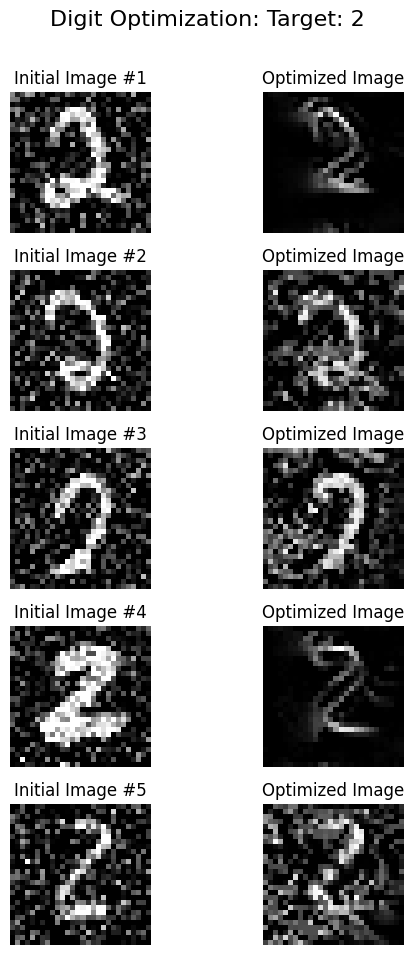

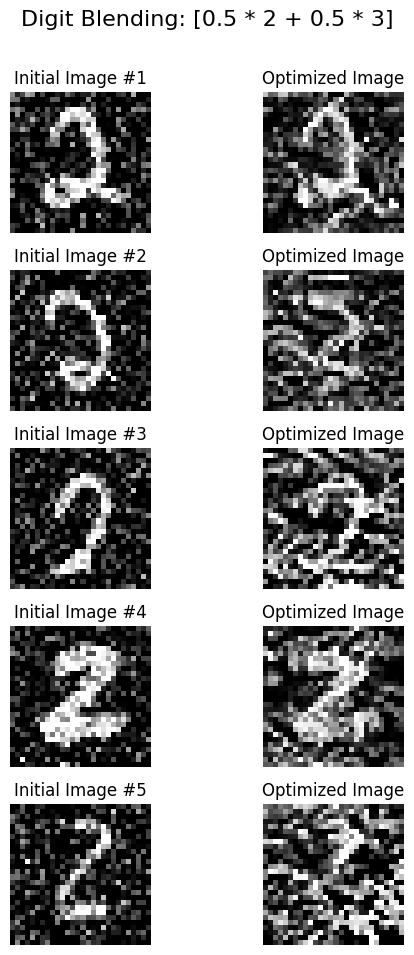

In [13]:
# Assuming you ran:
results = run_multiple_optimizations(model, x_train, y_train,
                                     target_digit=2,
                                     from_real_images=True,
                                     n_images=5,
                                     add_noise=True,
                                     steps=300)

# Then visualize with:
plot_optimized_images(results, title_prefix="Digit Optimization", target_label="Target: 2")

# For hybrid class:
hybrid_vector = [0, 0, 0.5, 0.5, 0, 0, 0, 0, 0, 0]
results_hybrid = run_multiple_optimizations(model, x_train, y_train,
                                            target_vector=hybrid_vector,
                                            target_digit=2,
                                            from_real_images=True,
                                            n_images=5,
                                            steps=300)

plot_optimized_images(results_hybrid, title_prefix="Digit Blending", target_label="[0.5 * 2 + 0.5 * 3]")